In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


Numeric

age age in years

sex (1 = male; 0 = female)

cp chest pain type

trestbps resting blood pressure (in mm Hg on admission to the hospital)

chol serum cholestoral in mg/dl

fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg resting electrocardiographic results

thalach maximum heart rate achieved

exang exercise induced angina (1 = yes; 0 = no)

oldpeak ST depression induced by exercise relative to rest

slope the slope of the peak exercise ST segment

ca number of major vessels (0-3) colored by flourosopy

thal 3 = normal; 6 = fixed defect; 7 = reversable defect

target 1 or 0 


In [4]:
##load data
all_data = pd.read_csv('heart.csv')
target = pd.DataFrame(all_data['target'], columns=['target'])
data = all_data.drop(['target'], axis=1)


# Data visualization

In [5]:
##data correlation

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


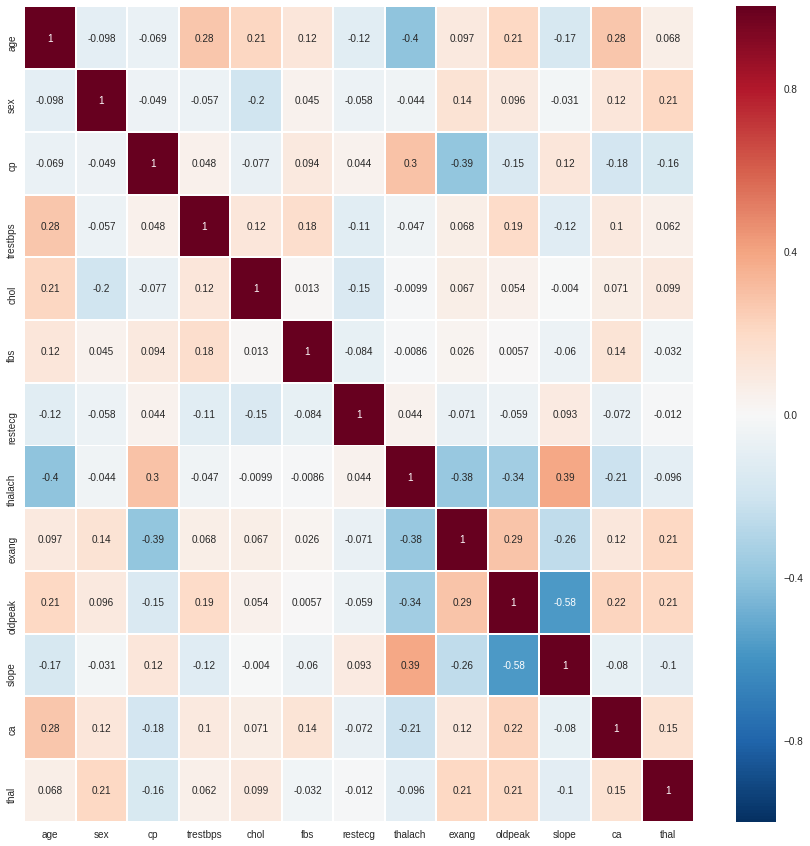

In [6]:
##data correlation
plt.figure(figsize=(15,15))
ax = sns.heatmap(data.corr(), linewidth=0.9, annot=True)
plt.show()

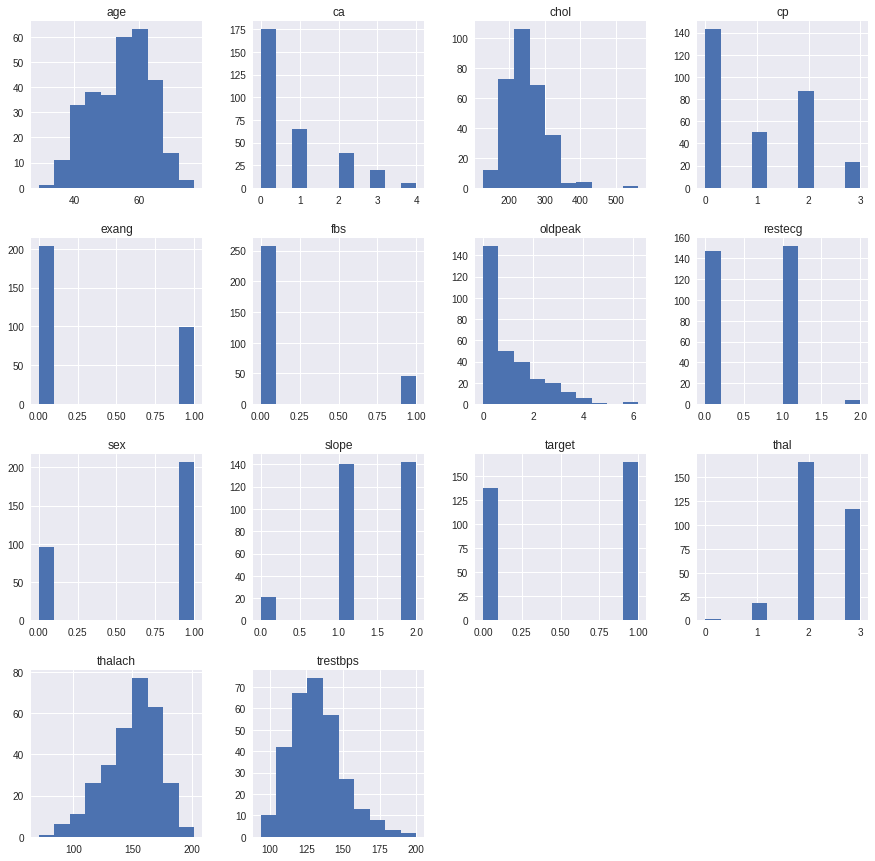

In [7]:
##data visualiztion
all_data.hist(figsize=(15,15))
plt.show()

not an unbalanced target

### in order to avoid bias in the test data, I split the data before features extraction

# Data spliting

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3)
xtrain.shape, xtest.shape

((212, 13), (91, 13))

# features extraction in the train data

# using lasso

In [9]:
from sklearn.linear_model import Lasso

### lasso hyperparameter tuning

In [10]:
from sklearn.model_selection import GridSearchCV
grid = {"max_iter": [1000, 2000, 3000, 4000, 5000], "alpha": np.linspace(10e-7, 10e-3, 10), "random_state":[5,10]}
lass = Lasso()
gridlass = GridSearchCV(lass, grid, cv=5)
gridlass.fit(xtrain, ytrain)
print("tuned hpyerparameters :(best parameters) ",gridlass.best_params_)
print("accuracy :",gridlass.best_score_)

tuned hpyerparameters :(best parameters)  {'max_iter': 1000, 'alpha': 0.004445, 'random_state': 5}
accuracy : 0.4181398445992918


In [11]:
import random
colors = []
for i in range(xtrain.shape[1]):
    colors.append("#{:06x}".format(random.randint(0, 0xFFFFFF)))

Features reduced from         13 to         13


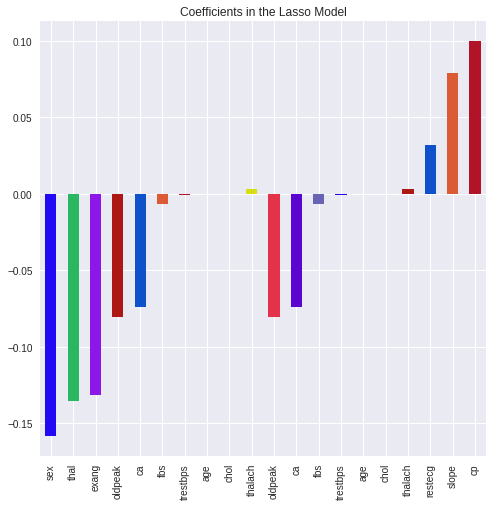

In [12]:
lasso = Lasso(max_iter=1000, alpha=0.004445, random_state=5)
lasso.fit(xtrain, ytrain)
coef = pd.Series(lasso.coef_, index = xtrain.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "bar", color=colors)
plt.title("Coefficients in the Lasso Model")

# Selection of features
good_features = np.abs(np.array(lasso.coef_)) > 0
print("Features reduced from %10d to %10d" % (xtrain.shape[1], int(good_features.sum())))

# using ExtraTreesClassifier

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.07199559 0.04187785 0.0930386  0.05598611 0.07335257 0.01761416
 0.04250455 0.09998819 0.14161473 0.1102018  0.06969683 0.10078254
 0.08134648]


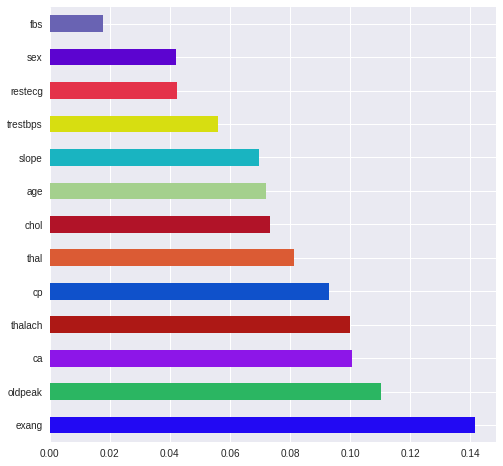

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(xtrain,np.array(ytrain)[:,0])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xtrain.columns)
feat_importances.nlargest(13).plot(kind='barh', color=colors)
plt.show()

### for lasso I gt 12 features and for ExtraTreeClassifier also I choose the best 12 featurs

In [14]:
x_train, y_train = xtrain.T[good_features].T, np.array(ytrain)[:,0]  ##good_features = 12 best features
x_test = xtest.T[good_features].T

# Compute ROC - AUC

In [15]:
def plot_roc(model, parameters, y_true):
    """
    Arguments:
    model - trained model .
    parameters - array-like or sparse matrix of shape  [n_samples, n_features]. The input samples. 
    y_true - True binary labels in range {0, 1} or {-1, 1}. If labels are not binary, pos_label should be explicitly given.
    """
    if model is None:
        return 0., 0., np.array([])
    
    predicted = model.predict_proba(parameters)[:,1]
    threshold = 0.5
    predicted_binary = (predicted > threshold).astype(int)
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, predicted, pos_label=1)

    roc_auc = metrics.auc(fpr, tpr) 
    ks = np.max(tpr - fpr) # Kolmogorov-Smirnov test

#     print('ROC_auc = ', roc_auc)
#     print('KS_test = ', ks)
    print('AUC score: %f ' % metrics.roc_auc_score(y_true, predicted)) 

    try:
        plt.title('%s ROC curve ' % model.__class__.__name__)
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1], [0,1], 'r--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')

        # plt.savefig('ROC_curve.png')
        plt.show()
    except: pass
    return threshold

# Modeling with default hyperparameter

# 1) RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rdf_model = RandomForestClassifier(n_estimators=1000)
scores  = cross_val_score(rdf_model, x_train, y_train, cv=20)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.24)


In [17]:
rdf_model.fit(x_train, y_train)
y_pred_rdf = rdf_model.predict(x_test)

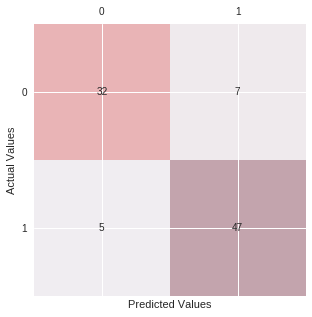

             precision    recall  f1-score   support

          0       0.86      0.82      0.84        39
          1       0.87      0.90      0.89        52

avg / total       0.87      0.87      0.87        91



In [18]:

cm = metrics.confusion_matrix(ytest, y_pred_rdf)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(metrics.classification_report(ytest, y_pred_rdf ))

AUC score: 0.915187 


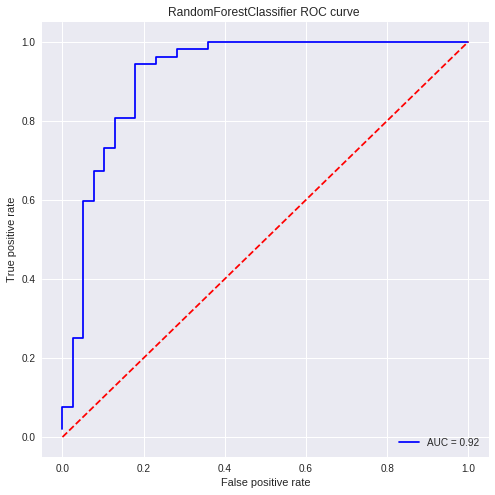

In [19]:
threshold = plot_roc(rdf_model, x_test, ytest)

# 2) SVM

In [47]:
from sklearn.svm import LinearSVC, NuSVC, SVC
linear_svc_model = LinearSVC(penalty='l1', dual=False)
scores  = cross_val_score(linear_svc_model, x_train, y_train, cv=20)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.25)


In [48]:
linear_svc_model.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [49]:
y_pred_linearsvc = linear_svc_model.predict(x_test)

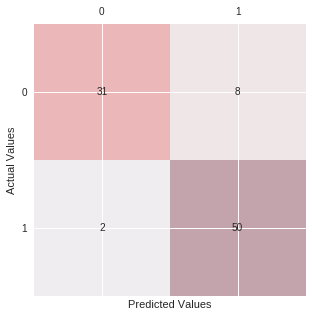

             precision    recall  f1-score   support

          0       0.94      0.79      0.86        39
          1       0.86      0.96      0.91        52

avg / total       0.90      0.89      0.89        91



In [50]:
cm = metrics.confusion_matrix(ytest, y_pred_linearsvc)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(metrics.classification_report(ytest, y_pred_linearsvc ))

In [58]:
svc_model = SVC(gamma=0.0001, probability=True)
scores = cross_val_score(svc_model, x_train, y_train, cv=20)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.30)


In [59]:
svc_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
y_pred_svc = svc_model.predict(x_test)


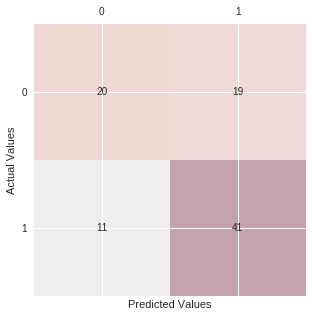

             precision    recall  f1-score   support

          0       0.65      0.51      0.57        39
          1       0.68      0.79      0.73        52

avg / total       0.67      0.67      0.66        91



In [61]:
cm = metrics.confusion_matrix(ytest, y_pred_svc)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(metrics.classification_report(ytest, y_pred_svc ))

AUC score: 0.679487 


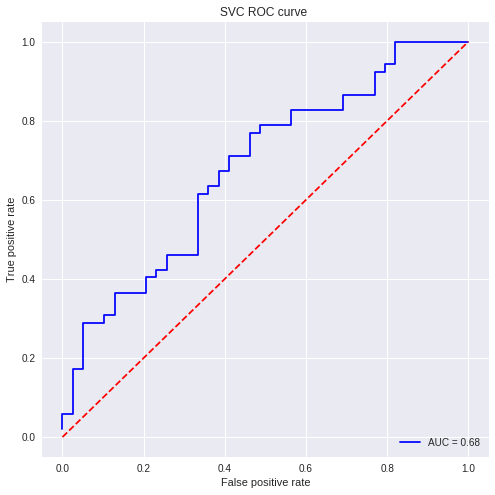

In [62]:
threshold = plot_roc(svc_model, x_test, ytest)

# hyperparameter tuning

# SVM

In [63]:
def svc_param_selection(X, y, nfolds):
    np.random.seed(41)
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
    grid_search = GridSearchCV(SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [47]:
svc_param_selection(x_train, y_train, 10)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [67]:
svm_model = SVC(C=1, gamma=0.001, kernel='linear', probability=True)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

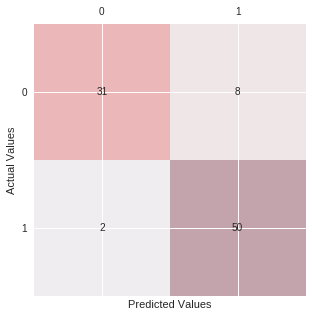

             precision    recall  f1-score   support

          0       0.94      0.79      0.86        39
          1       0.86      0.96      0.91        52

avg / total       0.90      0.89      0.89        91



In [68]:
cm = metrics.confusion_matrix(ytest, y_pred_svm)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(metrics.classification_report(ytest, y_pred_svm ))

AUC score: 0.925049 


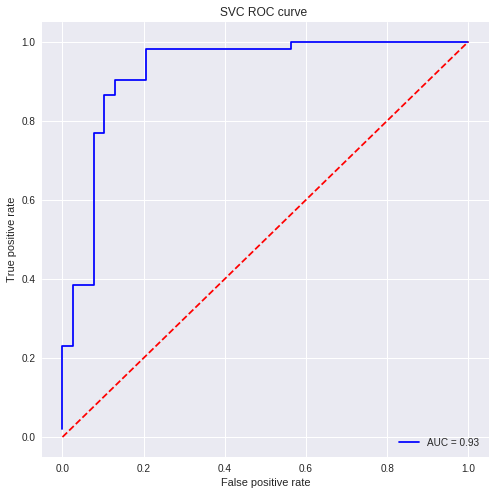

In [69]:
threshold = plot_roc(svm_model, x_test, ytest)